# Pg 337 - Chapter 10: How to make predictions with a linear regression model

In [1]:
import pandas as pd
import seaborn as sns

## Pg 340 - Get the data

In [2]:
housingPath = 'housingData.csv'
housing = pd.read_csv(housingPath)
housing.info(memory_usage = 'deep')
housing.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [3]:
housing = housing.query('sqft_living < 8000 and price < 1000000 and price > 0')
housing.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
5,2014-05-02 00:00:00,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA


In [4]:
housing['has_basement'] = housing['sqft_basement'].apply(
    lambda x: True if x > 0 else False)
housing.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,has_basement
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,False
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,False
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,True
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,True
5,2014-05-02 00:00:00,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA,False


In [5]:
housing = housing.drop(columns=['date','street','city','statezip','country',
                                'sqft_lot','yr_renovated','sqft_basement'])

## Pg 341 - The Housing dataset

In [6]:
housing.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4207 entries, 0 to 4599
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         4207 non-null   float64
 1   bedrooms      4207 non-null   float64
 2   bathrooms     4207 non-null   float64
 3   sqft_living   4207 non-null   int64  
 4   floors        4207 non-null   float64
 5   waterfront    4207 non-null   int64  
 6   view          4207 non-null   int64  
 7   condition     4207 non-null   int64  
 8   sqft_above    4207 non-null   int64  
 9   yr_built      4207 non-null   int64  
 10  has_basement  4207 non-null   bool   
dtypes: bool(1), float64(4), int64(6)
memory usage: 365.6 KB


In [7]:
housing.head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,sqft_above,yr_built,has_basement
0,313000.0,3.0,1.50,1340,1.5,0,0,3,1340,1955,False
2,342000.0,3.0,2.00,1930,1.0,0,0,4,1930,1966,False
3,420000.0,3.0,2.25,2000,1.0,0,0,4,1000,1963,True
4,550000.0,4.0,2.50,1940,1.0,0,0,4,1140,1976,True
5,490000.0,2.0,1.00,880,1.0,0,0,3,880,1938,False


## Pg 342 - How to identify correlations with a scatterplot

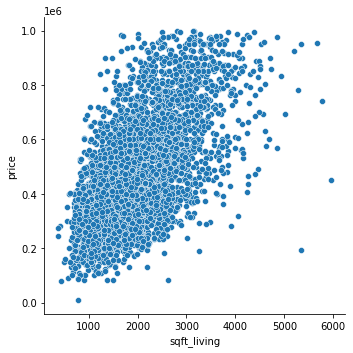

In [8]:
# Pg 343 -

sns.relplot(data=housing, x='sqft_living', y='price')

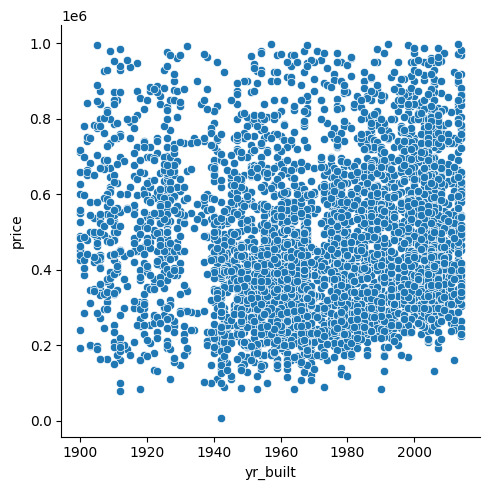

In [9]:
# Pg 343 -

sns.relplot(data=housing, x='yr_built', y='price')

## Pg 344 - How to identify correlations with a grid of scatterplots

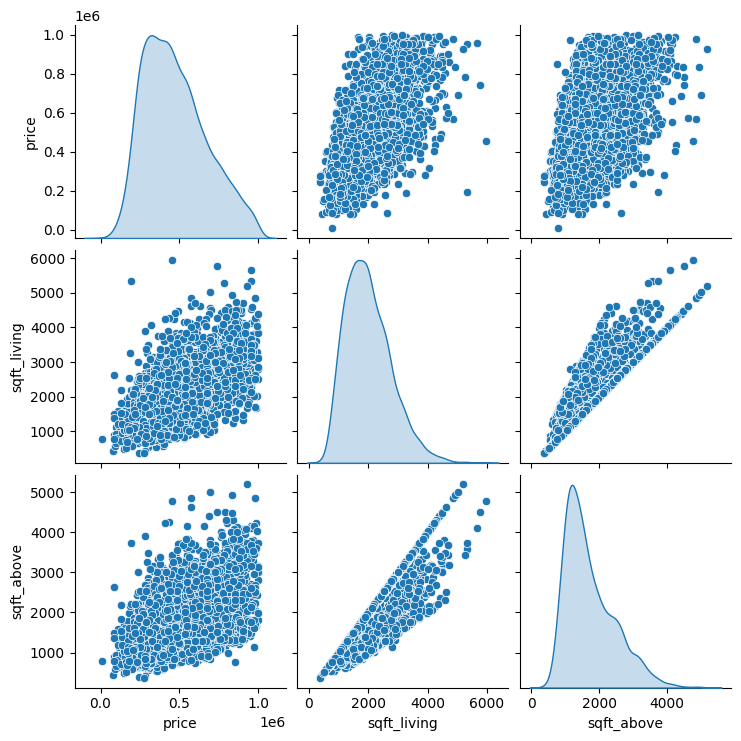

In [10]:
# Pg 345

sns.pairplot(data=housing,
             y_vars=['price','sqft_living','sqft_above'], 
             x_vars=['price','sqft_living','sqft_above'], 
                          diag_kind='kde');

## Pg 346 - How to identify correlations with r-values

In [11]:
# Pg 347

housing.corr().head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,sqft_above,yr_built,has_basement
price,1.000000,0.305046,0.460155,0.607379,0.272151,0.073671,0.196460,0.044926,0.517395,0.053012,0.152591
bedrooms,0.305046,1.000000,0.516726,0.603655,0.148377,-0.032263,0.060074,0.015105,0.466683,0.154287,0.157001
bathrooms,0.460155,0.516726,1.000000,0.715626,0.495380,0.020700,0.112797,-0.145555,0.637045,0.521801,0.127437
sqft_living,0.607379,0.603655,0.715626,1.000000,0.325647,0.030473,0.184432,-0.086310,0.848312,0.331001,0.175223
floors,0.272151,0.148377,0.495380,0.325647,1.000000,0.008710,-0.006647,-0.298350,0.526227,0.502039,-0.305249


In [12]:
# Pg 347

housing.corr()[['price']].sort_values(by='price', ascending=False)

,price
price,1.000000
sqft_living,0.607379
sqft_above,0.517395
bathrooms,0.460155
bedrooms,0.305046
floors,0.272151
view,0.196460
has_basement,0.152591
waterfront,0.073671
yr_built,0.053012


## Pg 348 - How to identify correlations with a heatmap

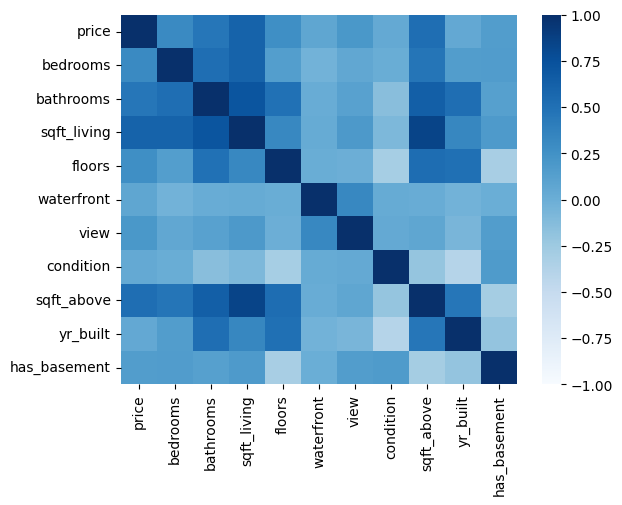

In [13]:
# Pg 349 

sns.heatmap(data=housing.corr(), cmap='Blues', vmin=-1.0, vmax=1.0);

<AxesSubplot:>

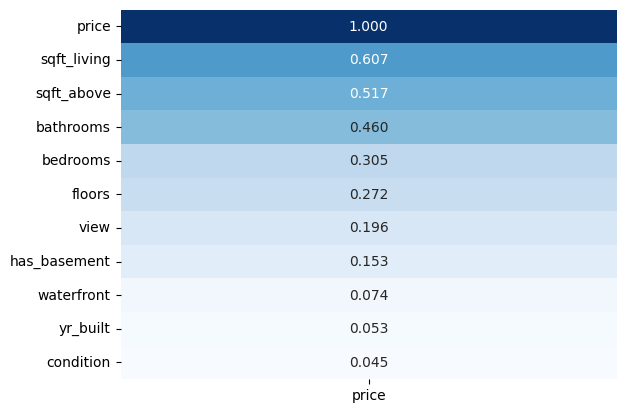

In [14]:
# Pg 349

sns.heatmap(data=housing.corr()[['price']].sort_values(by='price', ascending=False), 
            annot=True, cmap='Blues', cbar=False, fmt=f'.3f')

##  Pg 354 - How to create, validate, and use a linear regression model

In [15]:
# Pg 355 import the required sklearn modules

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [16]:
# Pg 355 split the data into the training and test datasets

x_train, x_test, y_train, y_test = train_test_split(
    housing[['sqft_living']], housing[['price']], 
    test_size=0.33, random_state=42)


In [17]:
# Pg 355 - create the model from the training dataset

linearModel = LinearRegression()
linearModel.fit(x_train, y_train)


LinearRegression()

In [18]:
# Pg 355 - validate the model with the test dataset

linearModel.score(x_test, y_test)


0.3507265465332233

In [19]:
# Pg 355 - use the model to make predictions
y_predicted = linearModel.predict(x_test)
y_predicted

array([[355333.11742787],
       [545363.47687159],
       [466838.5349527 ],
       ...,
       [325493.63949869],
       [415012.07328623],
       [394595.58838732]])

## Pg 356 - How to plot the predicted data

In [20]:
# Pg 357 - put predicted values in a DataFrame

predicted = pd.DataFrame(y_predicted, columns=['price_predicted'])

predicted.info()

predicted.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1389 entries, 0 to 1388
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price_predicted  1389 non-null   float64
dtypes: float64(1)
memory usage: 11.0 KB


,price_predicted
0,355333.117428
1,545363.476872
2,466838.534953
3,518664.996619
4,539081.481518


In [34]:
x_test.head()

,sqft_living
1855,1240
3834,2450
2755,1950
4364,2280
4286,2410


In [35]:
y_test.head()

,price
1855,390000.0
3834,345000.0
2755,375000.0
4364,500324.0
4286,600000.0


In [36]:
# Pg 357 -  combine the test data and the predicted data

combined = predicted.join([y_test.reset_index(drop=True),
                           x_test.reset_index(drop=True)])

combined.info()

combined.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1389 entries, 0 to 1388
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price_predicted  1389 non-null   float64
 1   price            1389 non-null   float64
 2   sqft_living      1389 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 32.7 KB


,price_predicted,price,sqft_living
0,355333.117428,390000.0,1240
1,545363.476872,345000.0,2450
2,466838.534953,375000.0,1950
3,518664.996619,500324.0,2280
4,539081.481518,600000.0,2410


In [22]:
# Pg 357 -  melt price and price_predicted columns into a single column

melted = pd.melt(combined, id_vars=['sqft_living'], 
                 value_vars=['price','price_predicted'], 
                 var_name='price_type', value_name='price_value')


In [23]:
# Pg 357 - The resulting DataFrame, displaying the results

melted.info()

melted.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2778 entries, 0 to 2777
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sqft_living  2778 non-null   int64  
 1   price_type   2778 non-null   object 
 2   price_value  2778 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 65.2+ KB


,sqft_living,price_type,price_value
0,1240,price,390000.0
1,2450,price,345000.0
2,1950,price,375000.0
3,2280,price,500324.0
4,2410,price,600000.0


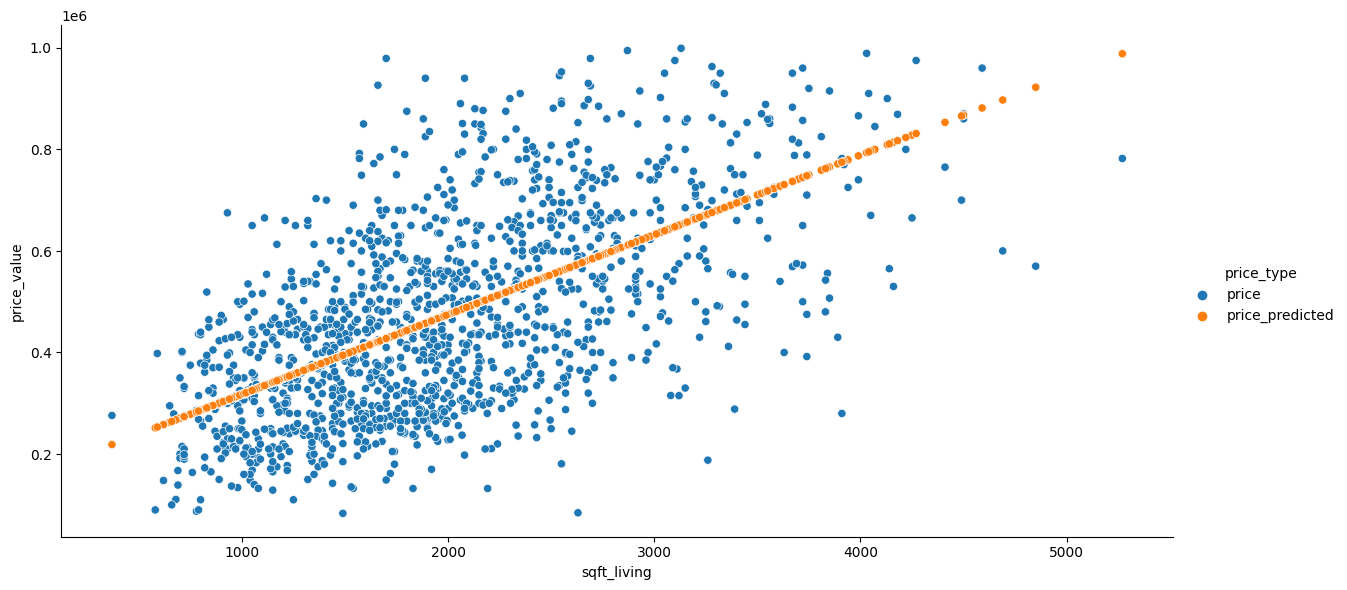

In [24]:
# Pg 357 - Plot the test and training data

sns.relplot(data=melted, x='sqft_living', y='price_value', 
            hue='price_type', height = 6, aspect = 2 );


## Pg 358 - How to plot the residuals

In [25]:
# 359 - How to calculate the residuals

combined['residual'] = combined.price - combined.price_predicted

combined.info()

combined.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1389 entries, 0 to 1388
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price_predicted  1389 non-null   float64
 1   sqft_living      1389 non-null   int64  
 2   price            1389 non-null   float64
 3   residual         1389 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 43.5 KB


,price_predicted,sqft_living,price,residual
0,355333.117428,1240,390000.0,34666.882572
1,545363.476872,2450,345000.0,-200363.476872
2,466838.534953,1950,375000.0,-91838.534953
3,518664.996619,2280,500324.0,-18340.996619
4,539081.481518,2410,600000.0,60918.518482


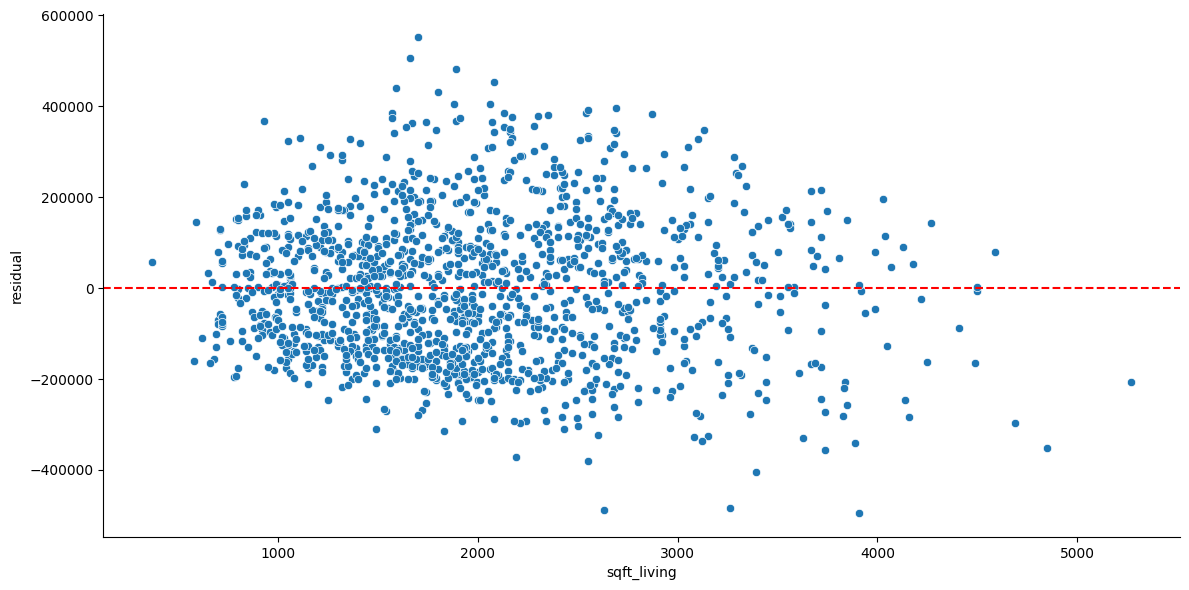

In [26]:
# 359 - How to plot the residuals

g = sns.relplot(data=combined, x='sqft_living', y='residual',
               height = 6, aspect = 2)

# draw a horizontal line where the Y axis is 0

for ax in g.axes.flat:
    # ax.set(ylim = (200000, -200000)) # set to limit range of y
    
    ax.axhline(0, ls='--', color = 'red')
    

## Pg 362 - How to plot a simple linear regression

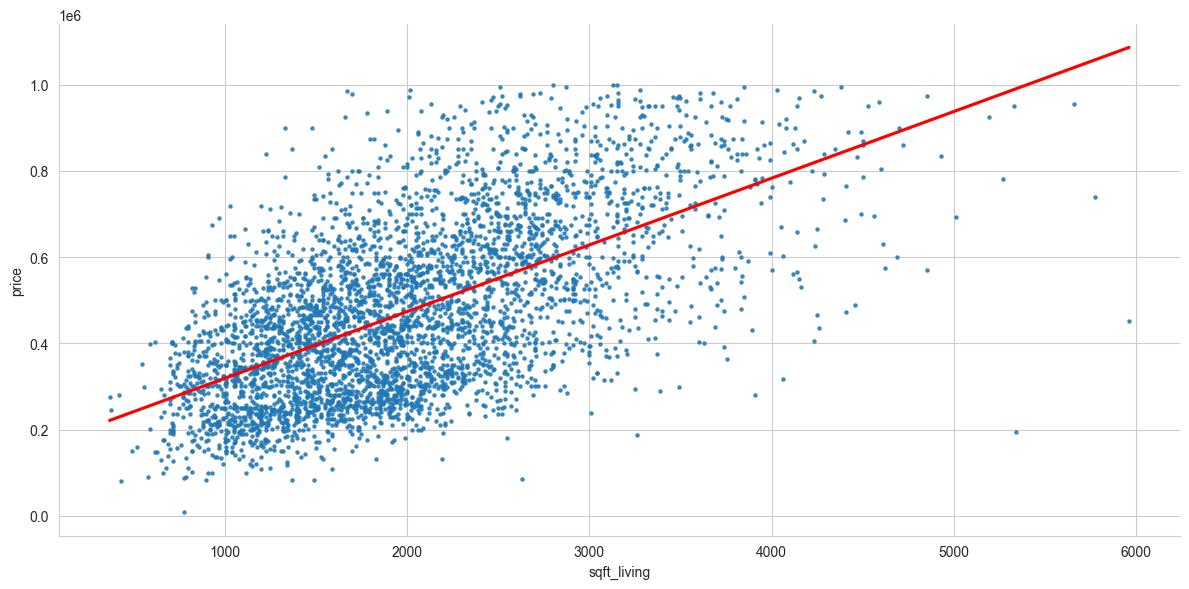

In [27]:
# 363 - a simple linear regression

# sns.set_style('ticks') # used to turn off the whitegrid option
sns.set_style('whitegrid') # used to turn on the whitegrid option

sns.lmplot(data=housing, x='sqft_living', y='price', ci = None,
           scatter_kws={'s':5}, line_kws={'color':'red'}, height = 6, aspect = 2);

## Pg 362 - How to plot a logistic regression

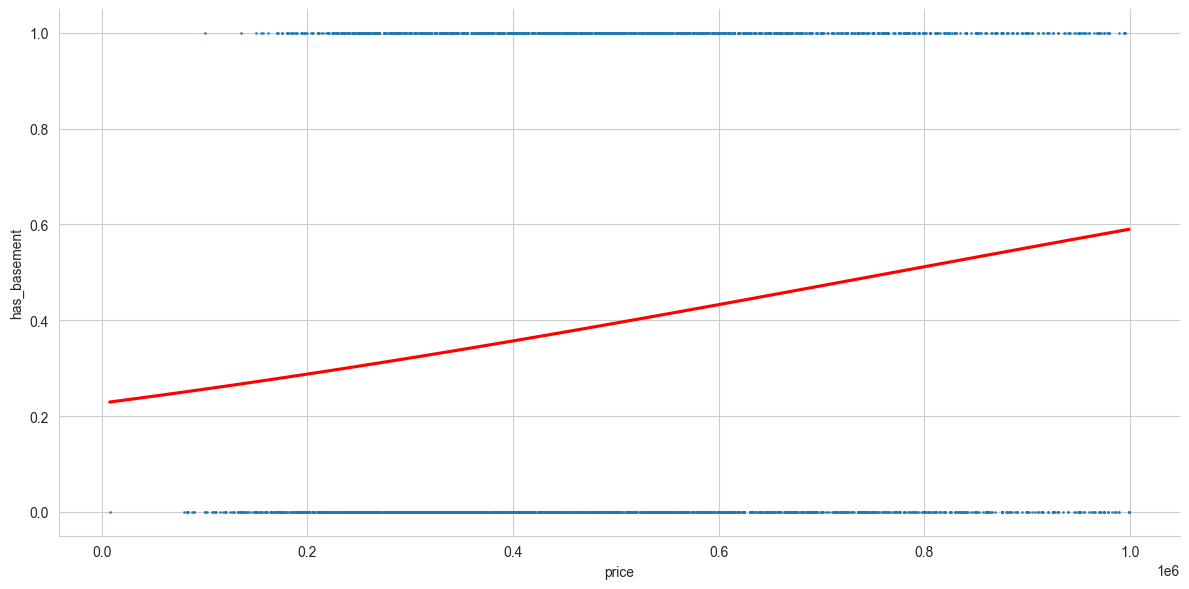

In [37]:
# 363 - a logistic regression

# Needed to do a pip install of statsmodels for this to work.
#   Didn't have to do the import, as proven by the commenting out
#     not having a negative impact on the plot.
# import statsmodels

# sns.set_style('ticks') # used to turn off the whitegrid option
sns.set_style('whitegrid') # used to turn on the whitegrid option


sns.lmplot(data = housing, x = 'price', y = 'has_basement', ci = None, 
           scatter_kws = {'s':1}, line_kws = {'color':'red'}, 
           logistic = True, height = 6, aspect = 2);


## Pg 364 - How to plot a polynormal regression

In [29]:
# Pg 365 - get the data for the mortality analysis

mortality_data = pd.read_pickle('mortality_data.pkl')
mortality_data.head()

,Year,AgeGroup,DeathRate
0,1900,01-04 Years,1983.8
1,1901,01-04 Years,1695.0
2,1902,01-04 Years,1655.7
3,1903,01-04 Years,1542.1
4,1904,01-04 Years,1591.5


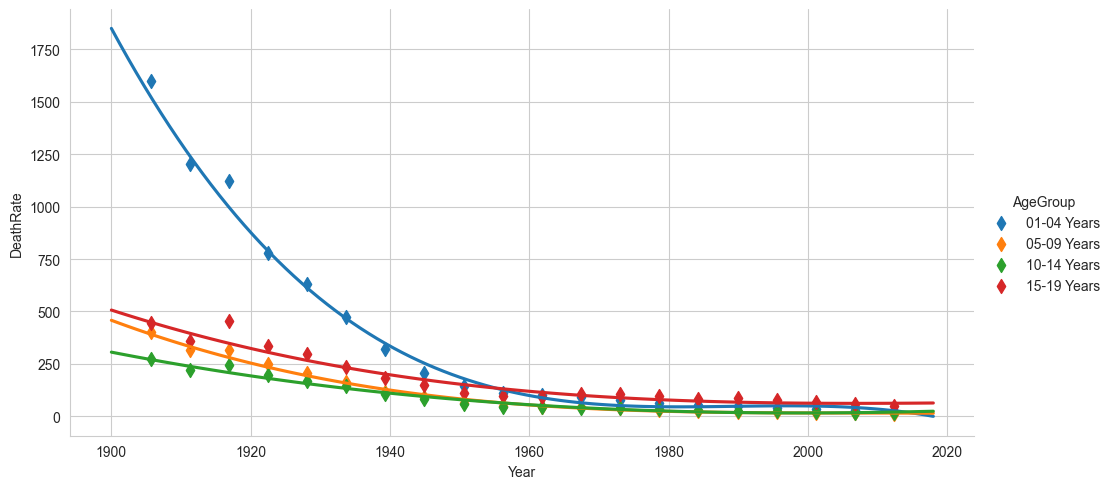

In [42]:
# Pg 365 - a polynomial regression

sns.lmplot(x='Year', y='DeathRate', hue='AgeGroup', data=mortality_data, ci=None,
           markers='d', x_bins = 20, order = 3, aspect = 2);

## Pg 364 - How to plot a lowess regression

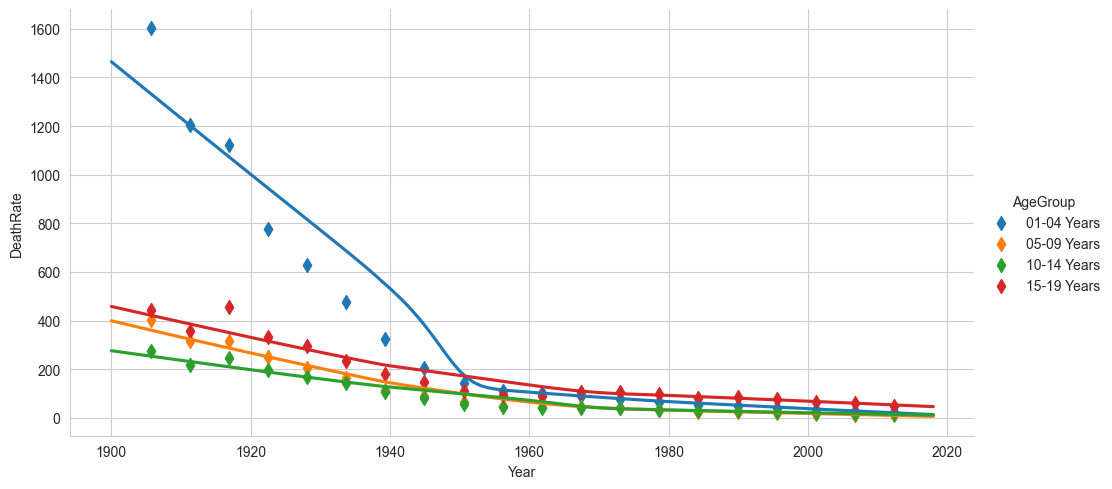

In [31]:
# Pg 365 - a lowess (locally weighted scatterplot smoothing) regression

sns.lmplot(data=mortality_data, x='Year', y='DeathRate', hue='AgeGroup', 
           ci=None, markers='d', x_bins=20, lowess=True, aspect = 2);

## Pg 366 - How to use the residplot() method to plot residuals with Seaborn

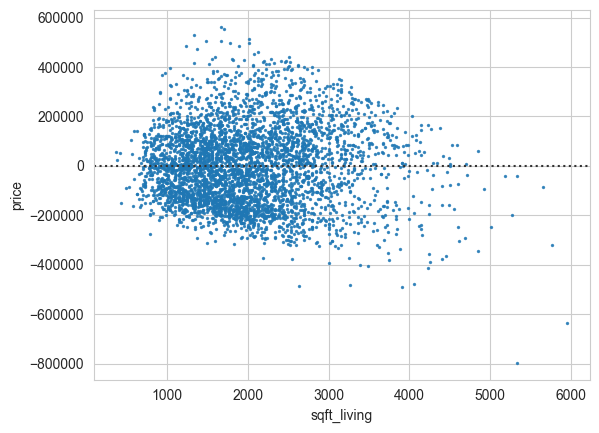

In [32]:
# 367 the residuals for a simple linear regression

sns.residplot(data=housing, x='sqft_living', y='price', 
              scatter_kws={'s':2});

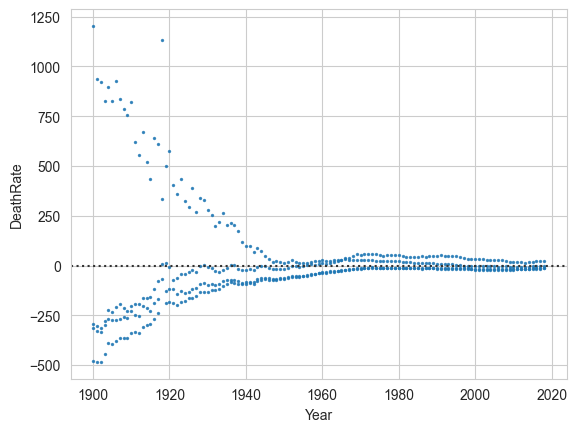

In [63]:
# 367 the residuals for a polynominal regression

sns.residplot(data=mortality_data, x='Year', y='DeathRate', 
              order=3, scatter_kws={'s':2});